In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5061,4135-FRWKJ,Female,1,Yes,Yes,55,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,One year,No,Electronic check,76.25,4154.55,No
6475,5448-VWNAM,Female,0,No,Yes,19,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,75.90,1375.6,No
3418,4176-FXYBO,Male,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,109.55,6118.95,No
367,7302-ZHMHP,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No
512,5956-VKDTT,Female,1,Yes,No,5,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,334.8,Yes


In [3]:
# Dropping Customer ID Column 
df.drop(['customerID'], axis=1, inplace=True)

In [4]:
# Data Types of column 
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Droping Records having Nan in TotalCharges
df = df[df['TotalCharges']!=' ']

# Converting Object to Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

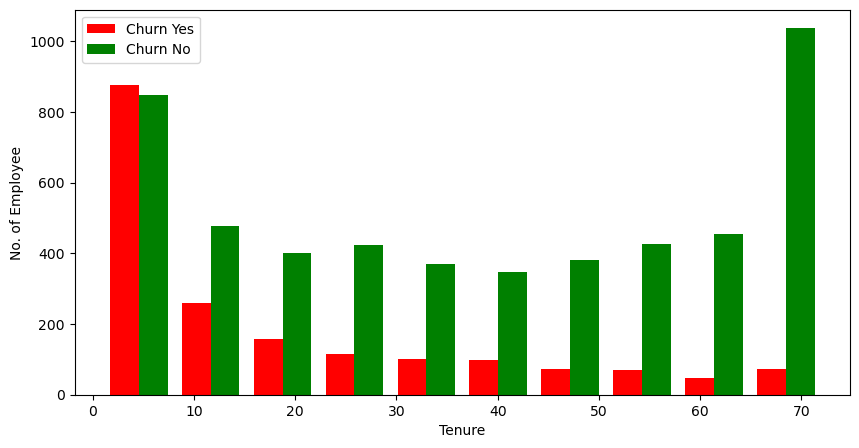

In [6]:
# Ploting Tenure of NO and Yes Churn
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure


plt.figure(figsize=(10,5))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], 
         label=['Churn Yes', 'Churn No'])
plt.xlabel("Tenure")
plt.ylabel("No. of Employee")
plt.legend();

# Label Encoding 

In [7]:
def unique_col_values(df):
    for col in df:
        if df[col].dtypes =='object':
            print(f"{col} : {df[col].unique()}")
            
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [8]:
# replacing "No internet service" and "No phone service" with "No"

df.replace("No internet service", "No", inplace=True)
df.replace("No phone service", "No", inplace=True)

In [9]:
unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [10]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'PaperlessBilling', 'Churn']

for col in yes_no_col:
    df[col].replace({"Yes":1, "No":0}, inplace=True)

In [11]:
unique_col_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [12]:
for col in yes_no_col:
    print(f"{col} : {df[col].unique()}")

Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
Churn : [0 1]


In [13]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# Encoding the Gender columns 
df['gender'].replace({'Female':0, 'Male':1}, inplace=True)
df.gender.unique()

array([0, 1], dtype=int64)

### One Hot Encoding 

In [15]:
cat_col = df.select_dtypes('object').columns
cat_col

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [16]:
df = pd.get_dummies(df, cat_col)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


# ReScaling the Data

In [17]:
scaler = MinMaxScaler()

df_scaled = df.copy()

for col in df_scaled:
    # Reshape the data before scaling
    col_data = df_scaled[col].values.reshape(-1, 1)

    # Apply MinMax scaling
    df_scaled[col] = scaler.fit_transform(col_data)

In [18]:
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modeling

### Train Test Split

In [19]:
# Independent Varable 
X = df_scaled.drop('Churn', axis=1)
# Dependent Variable
y = df_scaled['Churn']

In [20]:
# SPliuting the Dependent and Indepedent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shape of the split 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

### Model

In [21]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5588 - accuracy: 0.7028
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.7899
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4277 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4139 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8078
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4118 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3777 - accuracy: 0.8256
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8268
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8277
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3776 - accuracy: 0.8258
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8272
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3761 - accuracy: 0.8286
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3763 - accuracy: 0.8260
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3756 - accuracy: 0.8276
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3769 - accuracy: 0.8286
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 

# Evaluation

In [22]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.7754


[0.45439499616622925, 0.7754086852073669]

In [23]:
pred = model.predict(X_test)
pred[:10]

array([[0.01071509],
       [0.1102267 ],
       [0.6700507 ],
       [0.06547012],
       [0.36733183],
       [0.31001458],
       [0.11179614],
       [0.5658467 ],
       [0.03928606],
       [0.02451296]], dtype=float32)

In [24]:
# Converting float to Integer (Yes/No)
y_pred = []
for element in pred:
    if element>0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)
        
        
print(f"Prediction : {y_pred[:10]}")
print(f"True       : {y_test[:10].values}")

Prediction : [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
True       : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### Evaluation using Classification Report

In [25]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1033
         1.0       0.60      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



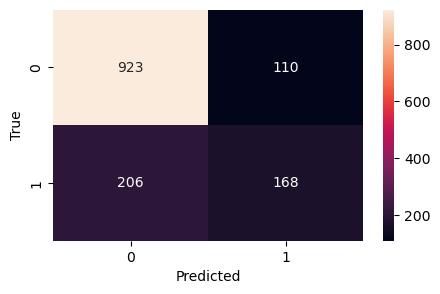

In [26]:
# Confusion Metrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True");

# Imbalance Data Treatement 

In [27]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
#       keras.layers.Dropout(0.2) # randomly droping 20% Neurons to avoid Overfitting 
        keras.layers.Dense(15, activation='relu'),
#       keras.layers.Dropout(0.2) # randomly droping 20% Neurons to avoid Overfitting 
        keras.layers.Dense(1,  activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights ==-1:
        model.fit(X_train, y_train, epochs=100)
        
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Reprot : \n", classification_report(y_test, y_preds))

    return y_preds

In [28]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5015 - accuracy: 0.7499
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4213 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4168 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8068
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4119 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4090 - accuracy: 0.8075
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8108
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8110
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4036 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8389
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3473 - accuracy: 0.8357
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.8386
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3471 - accuracy: 0.8389
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8411
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8373
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3447 - accuracy: 0.8382
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.8391
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8373
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3437 - accuracy: 

# 1. Under Sampling 

In [31]:
# Class Counts
count_class_0, count_class_1 = df_scaled.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [32]:
# Divide data by class

df_class_0 = df_scaled[df_scaled["Churn"]==0]
df_class_1 = df_scaled[df_scaled["Churn"]==1]

df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [33]:
# UnderSampling the Majority Class, by randomly selecting 1869 records 

df_class_0_under = df_class_0.sample(count_class_1)

# Check the shape of final data
df_class_0_under.shape, df_class_1.shape

((1869, 27), (1869, 27))

In [34]:
# Concatenating the both class data 
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

### train Test Split

In [35]:
# Dependent and Independent variable 
X = df_test_under.drop('Churn', axis=1)
y = df_test_under['Churn']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2990, 26), (748, 26), (2990,), (748,))

In [36]:
# Variffy the distribution of the classses in the y dataset 
y_train.value_counts(), y_test.value_counts()

(0.0    1495
 1.0    1495
 Name: Churn, dtype: int64,
 1.0    374
 0.0    374
 Name: Churn, dtype: int64)

In [37]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6547 - accuracy: 0.6371
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.7555
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4925 - accuracy: 0.7746
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7742
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.7709
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7793
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4655 - accuracy: 0.7783
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7776
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8187
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8174
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3890 - accuracy: 0.8177
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8231
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8197
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8201
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8221
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3874 - accuracy: 0.8201
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8194
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8221
Epoch 93/100


# 2. Over Sampling 

In [38]:
count_class_0, count_class_1

(5163, 1869)

In [40]:
# Oversampling the Miority Class by copying the data
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

# Varigy the shape of the both data class
df_class_1_over.shape, df_class_0.shape

((5163, 27), (5163, 27))

In [41]:
# Concatenating the both class Data 
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,0.215867,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.295775,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.704975,0.222779,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.126761,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114428,0.032668,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


###### Train Test Split 

In [42]:
# Dependent and Independent Variable
X = df_test_over.drop('Churn', axis=1)
y = df_test_over['Churn']

X.shape, y.shape

((10326, 26), (10326,))

In [43]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8260, 26), (2066, 26), (8260,), (2066,))

In [44]:
# Variffy the distribution of the classses in the y dataset 
y_train.value_counts(), y_test.value_counts()

(0.0    4130
 1.0    4130
 Name: Churn, dtype: int64,
 0.0    1033
 1.0    1033
 Name: Churn, dtype: int64)

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5522 - accuracy: 0.7232
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4854 - accuracy: 0.7720
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4759 - accuracy: 0.7760
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.7772
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4669 - accuracy: 0.7805
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.7809
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4608 - accuracy: 0.7838
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4575 - accuracy: 0.7835
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4555 - accuracy: 0.7833
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4538 - accura

259/259 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8238
Epoch 82/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3906 - accuracy: 0.8228
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3898 - accuracy: 0.8257
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3886 - accuracy: 0.8242
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3898 - accuracy: 0.8238
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8268
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8266
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8249
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3875 - accuracy: 0.8258
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3856 - accuracy: 

# 3. SMOTE (Synthetic Minority Oversampling Technique) 

In [46]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

X.shape, y.shape

((7032, 26), (7032,))

In [47]:
# Initialize the smote 
smote = SMOTE(sampling_strategy='minority')

# Fiting the SMOTE
X_sm, y_sm= smote.fit_resample(X, y)


y_sm.value_counts()

0.0    5163
1.0    5163
Name: Churn, dtype: int64

###### Train Test Split 

In [48]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8260, 26), (2066, 26), (8260,), (2066,))

In [49]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 4ms/step - loss: 0.5268 - accuracy: 0.7276
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7763
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4632 - accuracy: 0.7776
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4556 - accuracy: 0.7841
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.7862
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4477 - accuracy: 0.7889
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.7903
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.7909
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7914
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4370 - accura

259/259 [==============================] - 1s 5ms/step - loss: 0.3627 - accuracy: 0.8373
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3630 - accuracy: 0.8407
Epoch 83/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8397
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3626 - accuracy: 0.8387
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3609 - accuracy: 0.8402
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 0.8404
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3615 - accuracy: 0.8391
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8398
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8429
Epoch 90/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3582 - accuracy: 

# 4. Ensemble with undersampling 

In [50]:
df_scaled.Churn.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

###### TrainTest  Split 

In [51]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

X.shape, y.shape

((7032, 26), (7032,))

In [52]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [53]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [54]:
# Create DF of Majority Class
df_ens = X_train.copy()
df_ens['Churn'] = y_train

df_ens.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1413,1.0,0.0,1.0,1.0,0.901408,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.759204,0.699279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7003,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.174129,0.115820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3355,0.0,0.0,1.0,0.0,0.943662,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.715920,0.724538,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4494,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.657214,0.024954,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3541,0.0,0.0,1.0,0.0,0.676056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222886,0.236782,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
# Dividing the Majority class dataset into 3 set (4130/1495 ~ 3)
df_ens_class_0 = df_ens[df_ens.Churn==0]
df_ens_class_1 = df_ens[df_ens.Churn==1]

df_ens_class_0.shape, df_ens_class_1.shape

((4130, 27), (1495, 27))

In [56]:
df_ens_class_0.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1413,1.0,0.0,1.0,1.0,0.901408,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.759204,0.699279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7003,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.174129,0.115820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3355,0.0,0.0,1.0,0.0,0.943662,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.715920,0.724538,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4494,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.657214,0.024954,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3541,0.0,0.0,1.0,0.0,0.676056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222886,0.236782,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [57]:
# Create a def to accept 3 majority df one by one with the Test set to train
df_train = pd.concat([df_ens_class_0, df_ens_class_1], axis=0)
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1413,1.0,0.0,1.0,1.0,0.901408,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.759204,0.699279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7003,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.174129,0.115820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3355,0.0,0.0,1.0,0.0,0.943662,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.715920,0.724538,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4494,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.657214,0.024954,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3541,0.0,0.0,1.0,0.0,0.676056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222886,0.236782,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


###### Divide the Majority class into 3 different dataset with equal class distribution

In [58]:
# Create a def to accept 3 majority df one by one with the Test set to train
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    # Dependent and Independent variable
    X_train = df_train.drop("Churn", axis=1)
    y_train = df_train['Churn']
    
    return X_train, y_train

###### Model 1

In [59]:
X_train, y_train = get_train_batch(df_ens_class_0, df_ens_class_1, 0, 1495)

X_train.shape, y_train.shape

((2990, 26), (2990,))

In [60]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1.0,0.0,1.0,1.0,0.901408,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.759204,0.699279,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7003,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.174129,0.115820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3355,0.0,0.0,1.0,0.0,0.943662,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.715920,0.724538,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4494,1.0,0.0,0.0,0.0,0.028169,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.657214,0.024954,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3541,0.0,0.0,1.0,0.0,0.676056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.222886,0.236782,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
y_train.value_counts()

0.0    1495
1.0    1495
Name: Churn, dtype: int64

In [62]:
# Training the Model with different dataset created
y_pred_1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6137 - accuracy: 0.6569
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5042 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7589
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7615
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7625
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7649
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7732
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8134
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3819 - accuracy: 0.8164
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8194
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8177
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3782 - accuracy: 0.8231
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8281
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.8227
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3755 - accuracy: 0.8197
Epoch 93/100


###### Model 2

In [63]:
# Train test split
X_train, y_train = get_train_batch(df_ens_class_0, df_ens_class_1, 1495, 2990)

# Training the Model with different dataset created
y_pred_2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6473 - accuracy: 0.6485
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7495
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4942 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7699
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7769
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7769
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7783
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4725 - accuracy: 0.7799
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8157
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4033 - accuracy: 0.8154
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8161
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8171
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4020 - accuracy: 0.8157
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8191
Epoch 89/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8177
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8161
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8207
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8161
Epoch 93/100


###### Model 3

In [64]:
# Train test split
X_train, y_train = get_train_batch(df_ens_class_0, df_ens_class_1, 2990, 4130)

# Training the Model with different dataset created
y_pred_3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6321 - accuracy: 0.6398
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7484
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7704
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7757
Epoch 6/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7772
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.7806
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7856
Epoch 11/

83/83 [==============================] - 0s 4ms/step - loss: 0.3880 - accuracy: 0.8247
Epoch 84/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.8250
Epoch 85/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8250
Epoch 86/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.8262
Epoch 87/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8277
Epoch 88/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3857 - accuracy: 0.8273
Epoch 89/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3823 - accuracy: 0.8304
Epoch 90/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8311
Epoch 91/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8277
Epoch 92/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8296
Epoch 93/100


#### Merging the 3 results 

In [65]:
y_pred_final = []

for i in range(len(y_pred_1)):
    n_ones = y_pred_1[i] + y_pred_2[i] + y_pred_3[i]
    if n_ones > 1:
        y_pred_final.append(1)
    else :
        y_pred_final.append(0)

In [66]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      1033
         1.0       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

